In [18]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\HP\\miniconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [20]:
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

In [21]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag', 'Ankle boot'
]

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
len(train_labels)

60000

In [24]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
def countF(data, title, op=0):
    tmp = tmp = np.unique(data, return_counts=True)
    plt.bar(tmp[0], tmp[1])
    plt.title(title)

    if op == 1:
        plt.rcParams['axes.facecolor'] = 'white'
        plt.rcParams['figure.facecolor'] = 'white'
        plt.show()

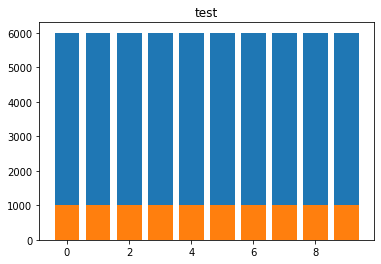

In [26]:
countF(train_labels, 'train')
countF(test_labels, 'test', 1)

In [27]:
def rangeChk():
    plt.figure()
    plt.imshow(train_images[0], cmap='gray')
    plt.colorbar()
    plt.grid(False)
    plt.show()

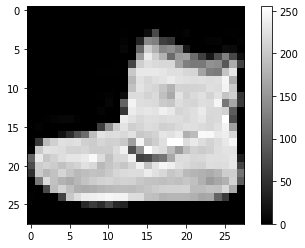

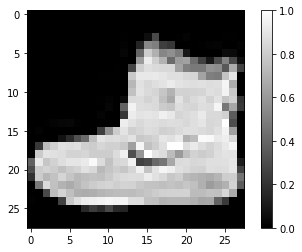

In [28]:
rangeChk()

train_images = train_images / 255.
test_images = test_images / 255.

rangeChk()

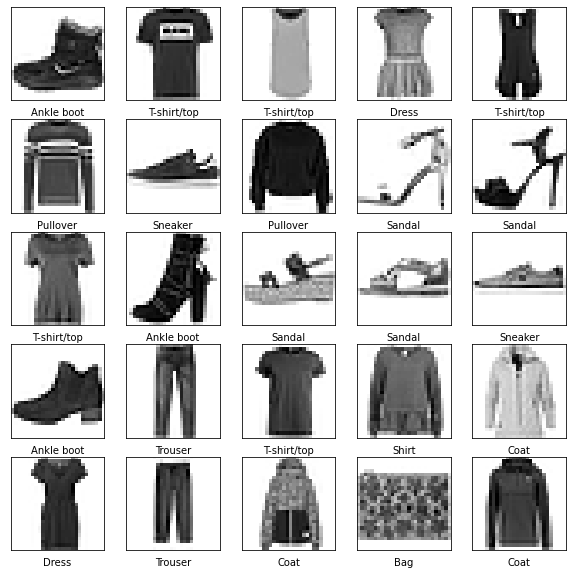

In [29]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

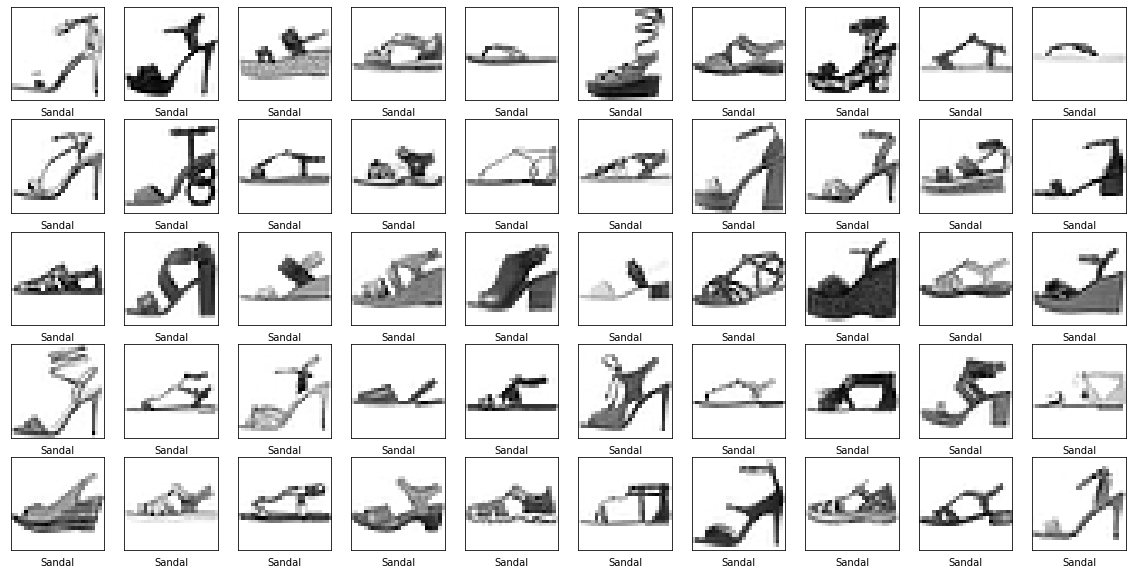

In [30]:
findRow = []
for cnt, x in enumerate(train_labels):
    if x == 5:
        findRow.append(cnt)

plt.figure(figsize=(20, 10))
for cnt, i in enumerate(findRow[:50]):
    plt.subplot(5, 10, cnt + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [31]:
class_names.index('Bag')

8

In [87]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512,
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [88]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

Epoch 1/15
300/300 [==============================] - 2s 7ms/step - loss: 0.3326 - accuracy: 0.8973 - val_loss: 0.3946 - val_accuracy: 0.8762
Epoch 2/15
300/300 [==============================] - 2s 7ms/step - loss: 0.3299 - accuracy: 0.8979 - val_loss: 0.4021 - val_accuracy: 0.8733
Epoch 3/15
300/300 [==============================] - 2s 8ms/step - loss: 0.3253 - accuracy: 0.8977 - val_loss: 0.3999 - val_accuracy: 0.8741
Epoch 4/15
300/300 [==============================] - 3s 9ms/step - loss: 0.3201 - accuracy: 0.9003 - val_loss: 0.3863 - val_accuracy: 0.8785
Epoch 5/15
300/300 [==============================] - 3s 8ms/step - loss: 0.3116 - accuracy: 0.9033 - val_loss: 0.3799 - val_accuracy: 0.8822
Epoch 6/15
300/300 [==============================] - 3s 9ms/step - loss: 0.3099 - accuracy: 0.9050 - val_loss: 0.4298 - val_accuracy: 0.8586
Epoch 7/15
300/300 [==============================] - 3s 8ms/step - loss: 0.3107 - accuracy: 0.9021 - val_loss: 0.3992 - val_accuracy: 0.8719
Epoch 

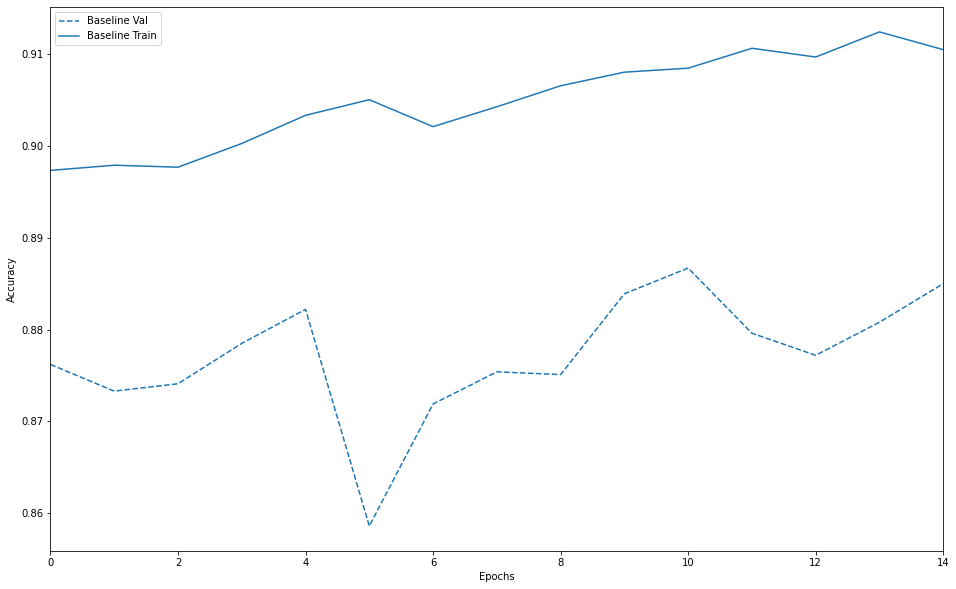

In [90]:
history = model.fit(train_images,
                    train_labels,
                    epochs=15,
                    verbose=1,
                    batch_size=200,
                    validation_data=(test_images, test_labels))

plot_history([('baseline', history)])

In [34]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch,
                       history.history['val_' + key],
                       '--',
                       label=name.title() + ' Val')
        plt.plot(history.epoch,
                 history.history[key],
                 color=val[0].get_color(),
                 label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

In [91]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

 36/313 [==>...........................] - ETA: 0s - loss: 0.3744 - accuracy: 0.8845

C:\Users\HP\miniconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 3ms/step - loss: 0.3772 - accuracy: 0.8850
Test accuracy: 0.8849999904632568


In [92]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [93]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [94]:
predictions[0]

array([0.08535995, 0.08535999, 0.08535993, 0.08535993, 0.08535996,
       0.08539177, 0.08535994, 0.08548604, 0.08536039, 0.23160216],
      dtype=float32)

In [95]:
np.argmax(predictions[0])

9

In [96]:
test_labels[0]

9

T-shirt/top class error List
(array([1, 2, 3, 4, 6, 8], dtype=int64), array([ 2, 17, 29,  3, 68, 10], dtype=int64))


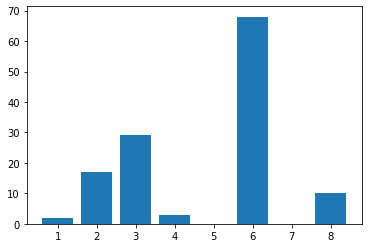

Trouser class error List
(array([0, 3, 4, 5, 6, 8], dtype=int64), array([ 5, 12,  2,  1,  1,  2], dtype=int64))


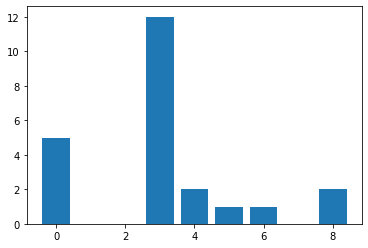

Pullover class error List
(array([0, 1, 3, 4, 6, 8], dtype=int64), array([21,  2, 16, 60, 44,  4], dtype=int64))


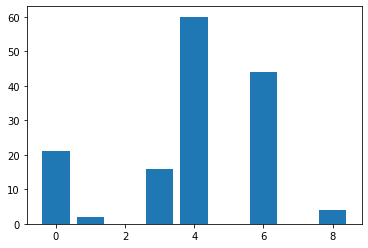

Dress class error List
(array([0, 1, 2, 4, 6, 8], dtype=int64), array([22, 18,  8, 45, 15,  4], dtype=int64))


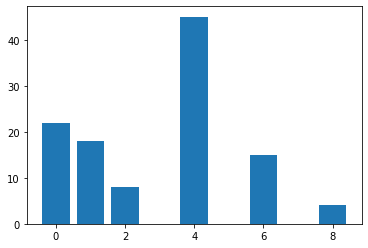

Coat class error List
(array([0, 1, 2, 3, 6, 8], dtype=int64), array([  3,   3, 123,  19,  45,   5], dtype=int64))


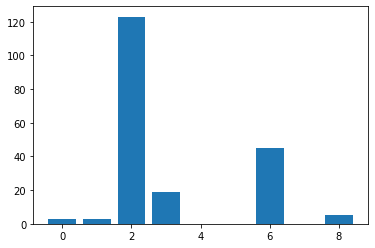

Sandal class error List
(array([7, 8, 9], dtype=int64), array([28,  6,  9], dtype=int64))


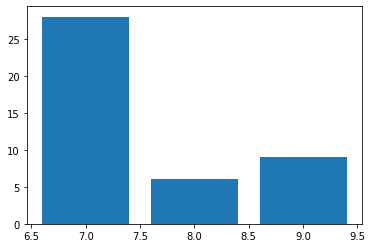

Shirt class error List
(array([0, 1, 2, 3, 4, 8], dtype=int64), array([165,   1, 116,  30,  55,  17], dtype=int64))


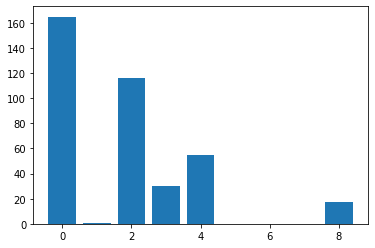

Sneaker class error List
(array([5, 8, 9], dtype=int64), array([11,  3, 33], dtype=int64))


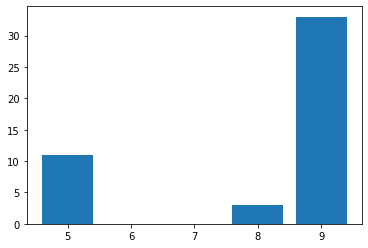

Bag class error List
(array([0, 3, 4, 5, 6, 7], dtype=int64), array([6, 7, 3, 1, 3, 1], dtype=int64))


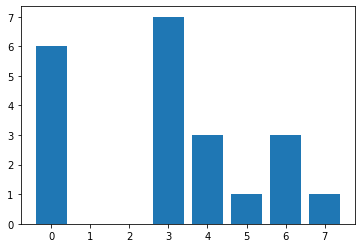

Ankle boot class error List
(array([0, 5, 7, 8], dtype=int64), array([ 1, 10, 34,  1], dtype=int64))


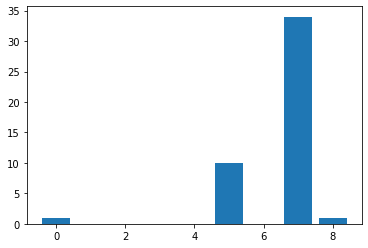

In [124]:
import pandas as pd

result = [np.argmax(x) for x in predictions]
df = pd.DataFrame({
    'test': test_labels,
    'result': result,
    'bigo': test_labels == result
})

findRow = df[df['bigo'] == False].index

errDf = df.iloc[findRow, :]
for x in range(10):
    print(class_names[x] + ' class error List')
    tmp = errDf[errDf['test'] == x]
    tmpU = np.unique(tmp['result'], return_counts=True)
    print(tmpU)
    plt.bar(tmpU[0], tmpU[1])
    plt.show()

In [126]:
np.unique(df['test'][df['bigo'] == False], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([129,  23, 147, 112, 198,  43, 384,  47,  21,  46], dtype=int64))

In [128]:
np.unique(df['result'][df['bigo'] == False], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([223,  26, 264, 113, 168,  23, 176,  63,  52,  42], dtype=int64))

1/1 [==============================] - 0s 17ms/step
Sandal상품을 중고나라에 올리셨습니다. 자동으로 Sandal 카테고리로 이동하겠습니다.


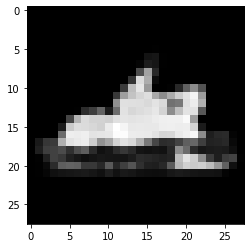

In [149]:
from PIL import Image

img = Image.open('images/sandal.jpg').convert('L')
img = img.resize((28, 28))
imgArr = np.array(img)
imgback = 255 - imgArr
plt.imshow(imgback, cmap='gray')

imgback = imgback.reshape(1, 28, 28)
primg = imgback / 255.

ca = class_names[np.argmax(probability_model.predict(primg))]
print(ca + '상품을 중고나라에 올리셨습니다. 자동으로 ' + ca + ' 카테고리로 이동하겠습니다.')

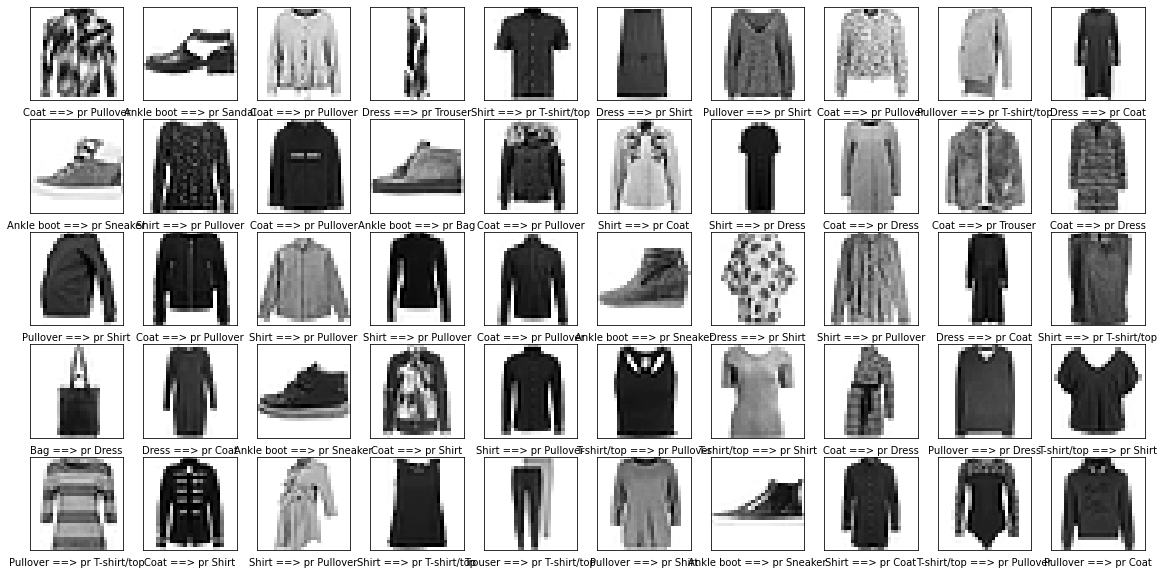

In [115]:
plt.figure(figsize=(20, 10))
for cnt, i in enumerate(findRow[:50]):
    plt.subplot(5, 10, cnt + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]] + ' ==> pr ' +
               class_names[df.iloc[i, 1]])

plt.show()

## 미션: fashion mnist 모델에서 예측한 결과로 폴더 이동

- class_name별 폴더를 제작 (권장사항: cate 폴더를 한 개 만들고 그 하위에 10개의 category)
- img 폴더를 제작해서 그 안에 사진을 여러개 넣음
    - 예측결과를 높이고 싶다면 모델 학습에 사용되었던 사진과 비슷한 사진으로 작업
    - 예측결과 상관없이 전체적인 걸 원한다면 어떤 사진이든 괜찮음
- img 폴더에서 첫번째 사진을 읽고 그 사진을 예측
    - 모델학습과 똑같은 상황을 만들어야됨 
        - (흑백, 28x28로 사이즈 변경, 255 빼서 검정배경으로 처리)
        - (np.arrau(), / 255.으로 스케일링)
    - 예측모델은 (1, 28, 28)로 넣어줘야 함
        - (사진한장은 (28, 28)이기 때문에 앞에 1 추가해야함)
    - 예측한 자료는 np.argmax로 가장 값이 큰 위치 index를 가져오고
    - 그 인덱스 값을 class_names에서 찾아서 결과물의 class_name을 확인함
- class_name으로 그 이미지를 이동 또는 복사

```python
img.save('cat/' + category + '.jpg')
```

In [152]:
import os

path = '.categories-fashion-mnist'
if not os.path.exists(path):
    os.makedirs(path)
    for category in class_names:
        cat_path = f'{path}/{category}'
        if not os.path.exists(cat_path):
            os.makedirs(cat_path)

In [153]:
imgList = []
imgList.append('ankleboot.jpg')
imgList.append('bag.webp')
imgList.append('coat.webp')
imgList.append('dress.webp')
imgList.append('pullover.jpg')
imgList.append('sandal.jpg')
imgList.append('shirt.webp')
imgList.append('sneaker.webp')
imgList.append('trouser.webp')
imgList.append('tshirt.webp')

In [178]:
import shutil

correct_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
result_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for filename in imgList:
    imgPath = f'images/{filename}'
    img = Image.open(imgPath).convert('L')
    img = img.resize((28, 28))
    imgArr = np.array(img)
    imgback = 255 - imgArr
    imgback = imgback.reshape(1, 28, 28)
    primg = imgback / 255.

    answer = filename.split('.')[0]
    result = class_names[np.argmax(probability_model.predict(primg))]
    print(answer, result)

    result_list[class_names.index(result)] += 1
    if answer == 'tshirt' and result == 'T-shirt/top':
        correct_list[class_names.index('T-shirt/top')] += 1
    if answer == 'pullover' and result == 'Trouser':
        correct_list[class_names.index('Trouser')] += 1
    if answer == 'pullover' and result == 'Pullover':
        correct_list[class_names.index('Pullover')] += 1
    if answer == 'dress' and result == 'Dress':
        correct_list[class_names.index('Dress')] += 1
    if answer == 'coat' and result == 'Coat':
        correct_list[class_names.index('Coat')] += 1
    if answer == 'sandal' and result == 'Sandal':
        correct_list[class_names.index('Sandal')] += 1
    if answer == 'shirt' and result == 'Shirt':
        correct_list[class_names.index('Shirt')] += 1
    if answer == 'sneaker' and result == 'Sneaker':
        correct_list[class_names.index('Sneaker')] += 1
    if answer == 'bag' and result == 'Bag':
        correct_list[class_names.index('Bag')] += 1

    target_path = f'.categories-fashion-mnist/{result}'
    shutil.copy(imgPath, target_path)

1/1 [==============================] - 0s 17ms/step
ankleboot Sneaker
1/1 [==============================] - 0s 19ms/step
bag Bag
1/1 [==============================] - 0s 18ms/step
coat Bag
1/1 [==============================] - 0s 14ms/step
dress Dress
1/1 [==============================] - 0s 20ms/step
pullover Bag
1/1 [==============================] - 0s 20ms/step
sandal Sandal
1/1 [==============================] - 0s 17ms/step
shirt Shirt
1/1 [==============================] - 0s 12ms/step
sneaker Sneaker
1/1 [==============================] - 0s 11ms/step
trouser Trouser
1/1 [==============================] - 0s 13ms/step
tshirt T-shirt/top


## 미션

- 각 폴더별 데이터 갯수를 차트로
- 일정한 폴더의 갯수가 30개가 넘으면 담당자에게 문자보내기

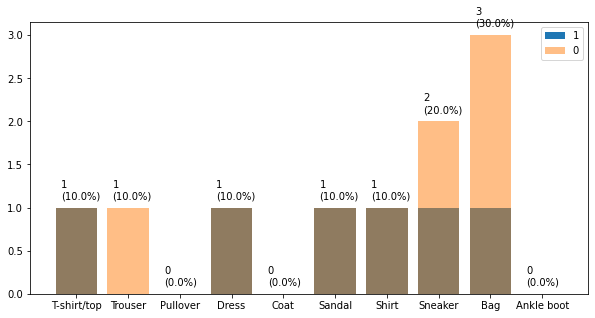

In [204]:
plt.figure(figsize=(10, 5))
plt.bar(class_names, correct_list)
plt.bar(class_names, result_list, alpha=0.5)
plt.legend(correct_list)

for cnt, x in enumerate(result_list):
    per = round(x / np.sum(result_list) * 100, 1)
    cntPer = str(x) + '\n(' + str(per) + '%)'
    plt.text(cnt - 0.3, 1 + x - 0.9, cntPer)

plt.show()

In [205]:
txt = ''
for name, cnt in zip(sorted(class_names), result_list):
    txt = txt + '\n▶' + name + '상품 count ===>' + str(cnt)

print(txt)


▶Ankle boot상품 count ===>1
▶Bag상품 count ===>1
▶Coat상품 count ===>0
▶Dress상품 count ===>1
▶Pullover상품 count ===>0
▶Sandal상품 count ===>1
▶Shirt상품 count ===>1
▶Sneaker상품 count ===>2
▶T-shirt/top상품 count ===>3
▶Trouser상품 count ===>0


In [ ]:
import smtplib
from email.mime.text import MIMEText

############## 메일 내용 ####################################
text = txt
############## 받는 사람 메일 정보
recv_email = ""  # 받는사람 이메일 주소

############## 보내는 메일 정보
send_email = ""  # 보내는사람 이메일주소
send_pwd = ""  # 보내는이메일 주소 비번

smtp_name = "smtp.mail.nate.com"  # 메일 보내는 주소의 smtp, 이건 각 사이트에서 검색해야함. 또는 구글 검색
smtp_port = 587  #네이버 587인데 네이트에도 가능함, 포트번호도 각 메일 사이트에서 찾아야함.

from datetime import datetime

title = datetime.today().strftime("%Y-%m-%d-%H:%M:%S") + ' : category 자료 현황'

msg = MIMEText(text)
msg['Subject'] = title
msg['From'] = send_email
msg['To'] = recv_email

s = smtplib.SMTP(smtp_name, smtp_port)
s.starttls()

s.login(send_email, send_pwd)
s.sendmail(send_email, recv_email, msg.as_string())
s.quit()

## 텐서 사이트 차트도 실행하고 해석

- https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [97]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

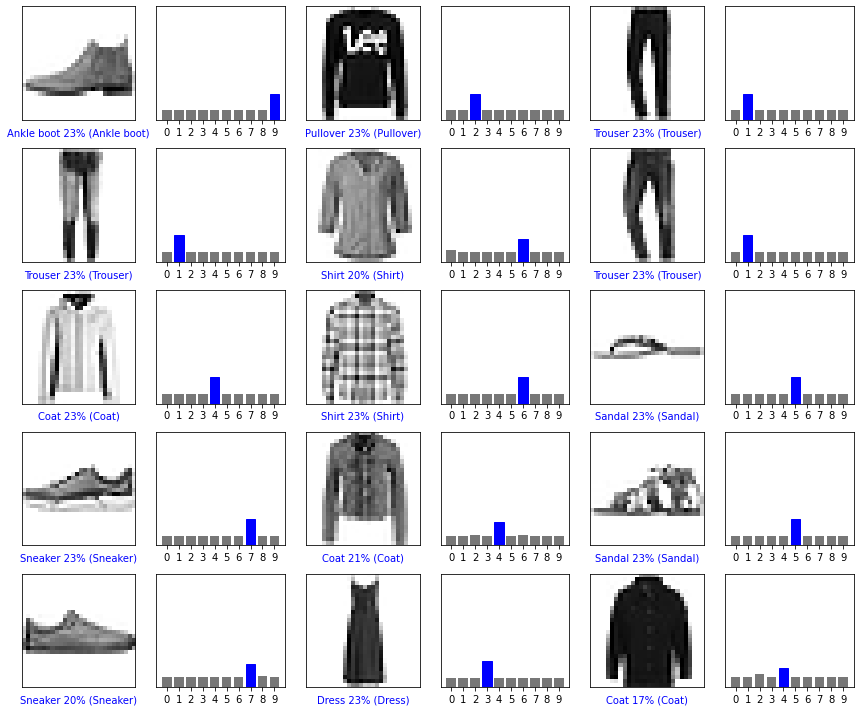

In [101]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()